In [2]:
import pandas as pd
import numpy as np

import pyspark as spark
import os

os.environ['JAVA_HOME'] = '/Library/Java/JavaVirtualMachines/adoptopenjdk-8.jdk/Contents/Home'

from dateutil.parser import parse

import matplotlib.pyplot as plt
import seaborn as sn

import re

# Excersise 2

In [3]:
df = pd.read_csv('quotes.csv')
df.head()

,Tacgia,Link,Namsinh,Quote
0,Albert Einstein,/author/Albert-Einstein,"March 14, 1879","['""The world as we have created it is a proces..."
1,Alexandre Dumas fils,/author/Alexandre-Dumas-fils,"July 27, 1824","['""The difference between genius and stupidity..."
2,Alfred Tennyson,/author/Alfred-Tennyson,"August 06, 1809","['""If I had a flower for every time I thought ..."
3,Allen Saunders,/author/Allen-Saunders,"April 24, 1899","['""Life is what happens to us while we are mak..."
4,André Gide,/author/Andre-Gide,"November 22, 1869","['""It is better to be hated for what you are t..."


In [4]:
df['Tacgia']=df['Tacgia'].astype('string')
df['Link']=df['Link'].astype('string')
df['Quote'] = pd.eval(df['Quote'])

# Convert column 'Namsinh' to timestamp and fill NaN by most frequence value
top_birth = df.describe().loc['top','Namsinh']

df['Namsinh'] = df['Namsinh'].fillna(top_birth)
df['Namsinh'] = df['Namsinh'].apply(lambda x: parse(x))

# Add column 'Tuoi' base on 'Namsinh'
df['Tuoi'] = (pd.Timestamp('now')-df['Namsinh']).astype('<m8[Y]')

print(df.dtypes)
df.head()

Tacgia             string
Link               string
Namsinh    datetime64[ns]
Quote              object
Tuoi              float64
dtype: object


,Tacgia,Link,Namsinh,Quote,Tuoi
0,Albert Einstein,/author/Albert-Einstein,1879-03-14,"[""The world as we have created it is a process...",142.0
1,Alexandre Dumas fils,/author/Alexandre-Dumas-fils,1824-07-27,"[""The difference between genius and stupidity ...",197.0
2,Alfred Tennyson,/author/Alfred-Tennyson,1809-08-06,"[""If I had a flower for every time I thought o...",212.0
3,Allen Saunders,/author/Allen-Saunders,1899-04-24,"[""Life is what happens to us while we are maki...",122.0
4,André Gide,/author/Andre-Gide,1869-11-22,"[""It is better to be hated for what you are th...",151.0


In [5]:
for i in range(df.shape[0]):
   print(f'Author: {df.loc[i].Tacgia:30} Number of quotes: {len(df.loc[i].Quote)}')

Author: Albert Einstein                Number of quotes: 10
Author: Alexandre Dumas fils           Number of quotes: 1
Author: Alfred Tennyson                Number of quotes: 1
Author: Allen Saunders                 Number of quotes: 1
Author: André Gide                     Number of quotes: 1
Author: Ayn Rand                       Number of quotes: 1
Author: Bob Marley                     Number of quotes: 3
Author: C.S. Lewis                     Number of quotes: 5
Author: Charles Bukowski               Number of quotes: 2
Author: Charles M. Schulz              Number of quotes: 1
Author: Douglas Adams                  Number of quotes: 1
Author: Dr. Seuss                      Number of quotes: 6
Author: E.E. Cummings                  Number of quotes: 1
Author: Eleanor Roosevelt              Number of quotes: 2
Author: Elie Wiesel                    Number of quotes: 1
Author: Ernest Hemingway               Number of quotes: 2
Author: Friedrich Nietzsche            Number of quotes

In [6]:
oldest = df[df.Tuoi == df.Tuoi.max()]
youngest = df[df.Tuoi == df.Tuoi.min()]

print('The average age of authors :',df['Tuoi'].describe()['mean'])

print(f'The oldest author: {oldest.iloc[0,0]}\n Day of birth: {oldest.iloc[0,2]} ({oldest.iloc[0,4]})')

print(f'The youngest author: {youngest.iloc[0,0]}\n Day of birth: {youngest.iloc[0,2]} ({youngest.iloc[0,4]})')

The average age of authors : 117.28
The oldest author: Jane Austen
 Day of birth: 1775-12-16 00:00:00 (245.0)
The youngest author: Stephenie Meyer
 Day of birth: 1973-12-24 00:00:00 (47.0)


In [7]:
quotes=[]
for i in df['Quote']:
   for j in i:
      quotes.append(j)

In [8]:
import string


longest = max(quotes,key=len)
print(f'The longest quote :\n\t{longest}\nNo.: {len(longest.split(" "))} words')

shortest = min(quotes,key=len)
print(f'\nThe shortest quote :\n\t{shortest}\nNo.: {len(shortest.split(" "))} words')

words = []
for i in quotes:
   regex = re.compile('[%s]' % re.escape(string.punctuation))
   i = regex.sub(' ',i)
   for j in i.split(' '):
      if len(j)>0:
         words.append(j)

print('\nOn average, each quote have',len(words)/len(quotes),'words')

The longest quote :
	"This life is what you make it. No matter what, you're going to mess up sometimes, it's a universal truth. But the good part is you get to decide how you're going to mess it up. Girls will be your friends - they'll act like it anyway. But just remember, some come, some go. The ones that stay with you through everything - they're your true best friends. Don't let go of them. Also remember, sisters make the best friends in the world. As for lovers, well, they'll come and go too. And baby, I hate to say it, most of them - actually pretty much all of them are going to break your heart, but you can't give up because if you give up, you'll never find your soulmate. You'll never find that half who makes you whole and that goes for everything. Just because you fail once, doesn't mean you're gonna fail at everything. Keep trying, hold on, and always, always, always believe in yourself, because if you don't, then who will, sweetie? So keep your head high, keep your chin up, 

In [9]:
sc = spark.SparkContext.getOrCreate()
words_sc = sc.parallelize(words)

21/10/25 08:35:54 WARN Utils: Your hostname, Quocs-MacBook-Pro.local resolves to a loopback address: 127.0.0.1; using 192.168.1.10 instead (on interface en0)
21/10/25 08:35:54 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
21/10/25 08:35:55 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [10]:
words_count = words_sc.map(lambda x:(x.lower(),1)).reduceByKey(lambda a,b: a+ b).sortBy(lambda x: x[1]).collect()

words_count

/usr/local/lib/python3.9/site-packages/pyspark/python/lib/pyspark.zip/pyspark/shuffle.py:60: UserWarning: Please install psutil to have better support with spilling
/usr/local/lib/python3.9/site-packages/pyspark/python/lib/pyspark.zip/pyspark/shuffle.py:60: UserWarning: Please install psutil to have better support with spilling
/usr/local/lib/python3.9/site-packages/pyspark/python/lib/pyspark.zip/pyspark/shuffle.py:60: UserWarning: Please install psutil to have better support with spilling
/usr/local/lib/python3.9/site-packages/pyspark/python/lib/pyspark.zip/pyspark/shuffle.py:60: UserWarning: Please install psutil to have better support with spilling
/usr/local/lib/python3.9/site-packages/pyspark/python/lib/pyspark.zip/pyspark/shuffle.py:60: UserWarning: Please install psutil to have better support with spilling
/usr/local/lib/python3.9/site-packages/pyspark/python/lib/pyspark.zip/pyspark/shuffle.py:60: UserWarning: Please install psutil to have better support with spilling
/usr/local

[('process', 1),
 ('cannot', 1),
 ('rather', 1),
 ('flower', 1),
 ('question', 1),
 ('perfect', 1),
 ('cup', 1),
 ('intact', 1),
 ('start', 1),
 ('sun', 1),
 ('attempt', 1),
 ('crazy', 1),
 ('horrible', 1),
 ('water', 1),
 ('ugliness', 1),
 ('faith', 1),
 ('loyal', 1),
 ('unhappy', 1),
 ('jojen', 1),
 ('yours', 1),
 ('far', 1),
 ('impossible', 1),
 ('why', 1),
 ('strayed', 1),
 ('diggory', 1),
 ('treated', 1),
 ('lost', 1),
 ('novel', 1),
 ('notion', 1),
 ('admiration', 1),
 ('declare', 1),
 ('excellent', 1),
 ('confirms', 1),
 ('belief', 1),
 ('inconsistency', 1),
 ('misinformed', 1),
 ('sometimes', 1),
 ('girls', 1),
 ('soulmate', 1),
 ('once', 1),
 ('eventually', 1),
 ('space', 1),
 ('kisses', 1),
 ('listens', 1),
 ('praise', 1),
 ('follows', 1),
 ('putting', 1),
 ('sixty', 1),
 ('finish', 1),
 ('spirit', 1),
 ('madly', 1),
 ('anytime', 1),
 ('trouble', 1),
 ('10', 1),
 ('work', 1),
 ('free', 1),
 ('z', 1),
 ('bicycle', 1),
 ('terms', 1),
 ('hated', 1),
 ('mistakes', 1),
 ('knows', 

In [11]:
freq_min = words_count[0][1]
freq_max = words_count[-1][1]
words_min = []
words_max = []

for i in words_count:
   if i[1] == freq_min:
      words_min.append(i[0])
   if i[1] == freq_max:
      words_max.append(i[0])

print(f'The least common word(s): {words_min}\nOccurrence: {freq_min} \nNo.: {len(words_min)}')
print(f'\nThe most common word(s): {words_max}\nOccurrence: {freq_max} \nNo.: {len(words_max)}')

The least common word(s): ['process', 'cannot', 'rather', 'flower', 'question', 'perfect', 'cup', 'intact', 'start', 'sun', 'attempt', 'crazy', 'horrible', 'water', 'ugliness', 'faith', 'loyal', 'unhappy', 'jojen', 'yours', 'far', 'impossible', 'why', 'strayed', 'diggory', 'treated', 'lost', 'novel', 'notion', 'admiration', 'declare', 'excellent', 'confirms', 'belief', 'inconsistency', 'misinformed', 'sometimes', 'girls', 'soulmate', 'once', 'eventually', 'space', 'kisses', 'listens', 'praise', 'follows', 'putting', 'sixty', 'finish', 'spirit', 'madly', 'anytime', 'trouble', '10', 'work', 'free', 'z', 'bicycle', 'terms', 'hated', 'mistakes', 'knows', 'god', 'poured', 'need', 'gone', 'intended', 'today', 'truer', 'ahead', 'courage', 'typewriter', 'church', 'christian', 'garage', 'accept', 'wish', 'whenever', 'show', 'failing', 'sighed', 'seem', 'intolerably', 'nature', 'few', 'still', 'dissatisfied', 'dependence', 'black', 'someday', 'written', 'stay', 'break', 'lies', 'devil', 'sleepy'

In [12]:
df['Quote_len'] = df['Quote'].apply(lambda x: len(x))

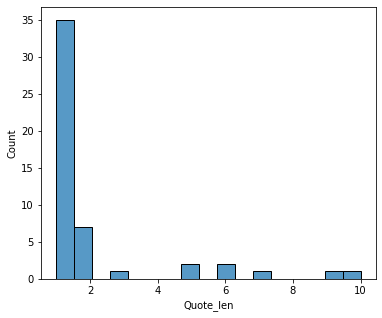

In [13]:
plt.figure(figsize=(6,5))
sn.histplot(df['Quote_len'])
plt.show()

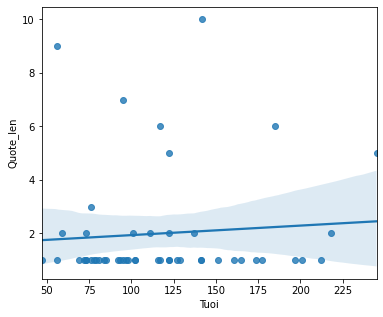

In [14]:
plt.figure(figsize=(6,5))
sn.regplot(data=df,x='Tuoi',y='Quote_len')
plt.show()

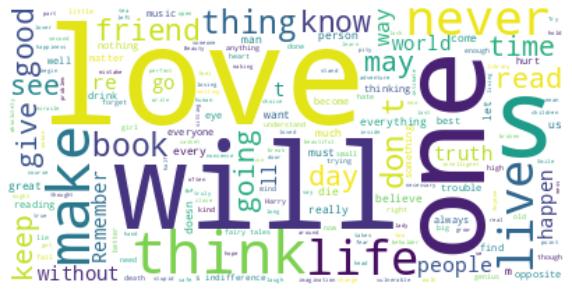

In [15]:
from wordcloud import STOPWORDS, WordCloud

my_stopwords = set(STOPWORDS)
words_collect = re.sub('\'','',str(words))
wc1 = WordCloud(stopwords = my_stopwords,background_color='white')
wc1.generate(words_collect)
plt.figure(figsize =(10, 8))
plt.imshow(wc1, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [16]:
df

,Tacgia,Link,Namsinh,Quote,Tuoi,Quote_len
0,Albert Einstein,/author/Albert-Einstein,1879-03-14,"[""The world as we have created it is a process...",142.0,10
1,Alexandre Dumas fils,/author/Alexandre-Dumas-fils,1824-07-27,"[""The difference between genius and stupidity ...",197.0,1
2,Alfred Tennyson,/author/Alfred-Tennyson,1809-08-06,"[""If I had a flower for every time I thought o...",212.0,1
3,Allen Saunders,/author/Allen-Saunders,1899-04-24,"[""Life is what happens to us while we are maki...",122.0,1
4,André Gide,/author/Andre-Gide,1869-11-22,"[""It is better to be hated for what you are th...",151.0,1
5,Ayn Rand,/author/Ayn-Rand,1905-02-02,"[""The question isn't who is going to let me; i...",116.0,1
6,Bob Marley,/author/Bob-Marley,1945-02-06,"[""You may not be her first, her last, or her o...",76.0,3
7,C.S. Lewis,/author/C-S-Lewis,1898-11-29,"[""You can never get a cup of tea large enough ...",122.0,5
8,Charles Bukowski,/author/Charles-Bukowski,1920-08-16,"[""That's the problem with drinking, I thought,...",101.0,2
9,Charles M. Schulz,/author/Charles-M-Schulz,1922-11-26,"[""All you need is love. But a little chocolate...",98.0,1


In [17]:
data = pd.read_csv('my_quotes.csv')
data.head()

,Tacgia,Link,Namsinh,Tags,Quote
0,Albert Einstein,/author/Albert-Einstein,"March 14, 1879","['change', 'deep-thoughts', 'thinking', 'world']",“The world as we have created it is a process ...
1,J.K. Rowling,/author/J-K-Rowling,"July 31, 1965","['abilities', 'choices']","“It is our choices, Harry, that show what we t..."
2,Albert Einstein,/author/Albert-Einstein,"March 14, 1879","['inspirational', 'life', 'live', 'miracle', '...",“There are only two ways to live your life. On...
3,Jane Austen,/author/Jane-Austen,"December 16, 1775","['aliteracy', 'books', 'classic', 'humor']","“The person, be it gentleman or lady, who has ..."
4,Marilyn Monroe,/author/Marilyn-Monroe,"June 01, 1926","['be-yourself', 'inspirational']","“Imperfection is beauty, madness is genius and..."


In [18]:
import spacy

token_arr = []
nlp = spacy.load("en_core_web_sm")

for i in data['Quote']:
   doc = nlp(i)
   for token in doc:
      token_arr.append(token.text)

token_arr = list(dict.fromkeys(token_arr))
print(token_arr)

['“', 'The', 'world', 'as', 'we', 'have', 'created', 'it', 'is', 'a', 'process', 'of', 'our', 'thinking', '.', 'It', 'can', 'not', 'be', 'changed', 'without', 'changing', '”', 'choices', ',', 'Harry', 'that', 'show', 'what', 'truly', 'are', 'far', 'more', 'than', 'abilities', 'There', 'only', 'two', 'ways', 'to', 'live', 'your', 'life', 'One', 'though', 'nothing', 'miracle', 'other', 'everything', 'person', 'gentleman', 'or', 'lady', 'who', 'has', 'pleasure', 'in', 'good', 'novel', 'must', 'intolerably', 'stupid', 'Imperfection', 'beauty', 'madness', 'genius', 'and', "'s", 'better', 'absolutely', 'ridiculous', 'boring', 'Try', 'become', 'man', 'success', 'Rather', 'value', 'hated', 'for', 'you', 'loved', 'I', 'failed', "'ve", 'just', 'found', '10,000', 'wo', "n't", 'work', 'A', 'woman', 'like', 'tea', 'bag', ';', 'never', 'know', 'how', 'strong', 'until', 'hot', 'water', 'day', 'sunshine', 'night', 'This', 'make', 'No', 'matter', "'re", 'going', 'mess', 'up', 'sometimes', 'universal', 

In [19]:
df2 = pd.DataFrame([],columns = token_arr+['Tacgia'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Columns: 725 entries, “ to Tacgia
dtypes: object(725)
memory usage: 0.0+ bytes


In [20]:
for i in range(data.shape[0]):
   temp = {}
   temp['Tacgia'] = data.loc[i]['Tacgia']
   doc = nlp(data.loc[i]['Quote'])
   for t in doc:
      if t.text in temp:
         temp[t.text] += 1
      else:
         temp[t.text] = 1

   df2 = df2.append(temp,ignore_index=True)

In [21]:
df2.fillna(0,inplace=True)
df2.head()

,“,The,world,as,we,have,created,it,is,a,...,grown,ups,Never,tell,worthy,needs,sword,whetstone,edge,Tacgia
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,Albert Einstein
1,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,J.K. Rowling
2,1,1,0,2,0,0,0,0,4,2,...,0,0,0,0,0,0,0,0,0,Albert Einstein
3,1,1,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,Jane Austen
4,1,0,0,0,0,0,0,1,2,0,...,0,0,0,0,0,0,0,0,0,Marilyn Monroe


In [22]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
column_names = df2.columns.values
for i in range(len(column_names)):
  if df2.dtypes[i]=='object':
    df2[column_names[i]] = encoder.fit_transform(df2[column_names[i]])

In [23]:
df2.head()

,“,The,world,as,we,have,created,it,is,a,...,grown,ups,Never,tell,worthy,needs,sword,whetstone,edge,Tacgia
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,26
2,1,1,0,2,0,0,0,0,4,2,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,30
4,1,0,0,0,0,0,0,1,2,0,...,0,0,0,0,0,0,0,0,0,37


In [62]:
# classify
train = pd.concat([df2.loc[df2['Tacgia']==0][0:8],df2.loc[df2['Tacgia']!=0]])
test = df2.loc[df2['Tacgia']==0][9:]
x_train = train.values[:,:-1]
x_test = test.values[:,:-1]

print('--- x_train ---')
print(x_train)
print(x_train.shape)
print('\n--- x_test ---')
print(x_test)
print(x_test.shape)

--- x_train ---
[[1 1 1 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 1 1 1]]
(98, 724)

--- x_test ---
[[1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 

In [63]:
y_train = train.values[:,-1]
y_test = test.values[:,-1]

print('--- y_train ---')
print(y_train)
print(y_train.shape)
print('\n--- y_test ---')
print(y_test)
print(y_test.shape)

--- y_train ---
[ 0  0  0  0  0  0  0  0 26 30 37  4 47 13 44 37 26  6 11 10 14 16 38  3
 41 42 40 17 31 11 26  6 11 26  6 40 26  9 49 34 20 21  7 37 37 37 37 39
 26 29 30 13 37 23  1 43 15 24 18  8 45 45  7 28 26 15 42 38 11  2  8 46
 11 25 19 33 48  5 38 30 26 30 30  7  7 38 38  7 26 32 27 12 35 22 36 38
 11 21]
(98,)

--- y_test ---
[0]
(1,)


In [64]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(50)
])

In [65]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [67]:
model.fit(x_train, y_train, epochs=30)

Epoch 1/30
4/4 [==============================] - 0s 1ms/step - loss: 2.3091 - accuracy: 0.7653
Epoch 2/30
4/4 [==============================] - 0s 2ms/step - loss: 2.2691 - accuracy: 0.7755
Epoch 3/30
4/4 [==============================] - 0s 1ms/step - loss: 2.2285 - accuracy: 0.8061
Epoch 4/30
4/4 [==============================] - 0s 2ms/step - loss: 2.1911 - accuracy: 0.8163
Epoch 5/30
4/4 [==============================] - 0s 1ms/step - loss: 2.1520 - accuracy: 0.8265
Epoch 6/30
4/4 [==============================] - 0s 2ms/step - loss: 2.1155 - accuracy: 0.8265

In [54]:
test_loss, test_acc = model.evaluate(x_test,y_test, verbose=2)

print('\nTest accuracy:', test_acc)

1/1 - 0s - loss: 3.2948 - accuracy: 0.2000

Test accuracy: 0.20000000298023224


In [68]:
probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])
predictions = probability_model.predict(x_test)
print(predictions)
np.argmax(predictions[0])

[[0.03554776 0.01633161 0.01357967 0.01245154 0.01458056 0.01234463
  0.01679287 0.05407576 0.02271123 0.01207566 0.01201717 0.02422218
  0.02384449 0.03473854 0.01182901 0.02080363 0.0185265  0.01757919
  0.0106593  0.01568906 0.02221837 0.03777345 0.01610117 0.01426776
  0.01968435 0.01079296 0.02423949 0.01175696 0.02479462 0.01661391
  0.03732323 0.01373676 0.02029477 0.01102459 0.01533667 0.02360494
  0.0157361  0.05056461 0.03762344 0.01048066 0.01530451 0.01051292
  0.02065108 0.02266639 0.01307675 0.01632055 0.01335315 0.01561441
  0.02269963 0.01543144]]


7